# Complejidad de datos

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [3]:
medicalConditions = pd.read_csv('datasets/medical_conditions_dataset.csv')
profile = ProfileReport(medicalConditions,title='Medical_conditions report')
medicalConditions.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


In [4]:
# Crear el reporte para ver si hay datos perdidos en el dataset
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

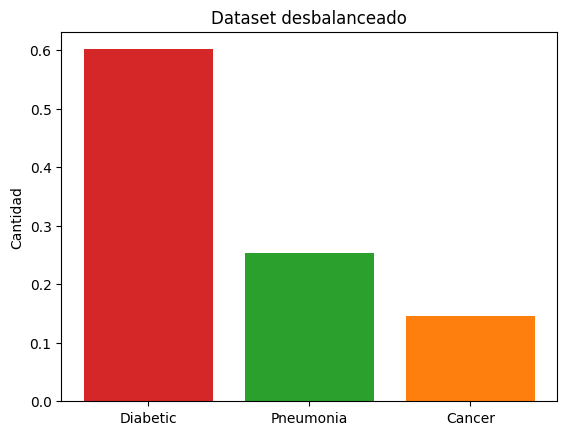

In [5]:
# Creamos un grafico para visualizar el desbalance de los datos
clases = medicalConditions['condition'].value_counts(normalize=True)
bar_colors = ['tab:red', 'tab:green', 'tab:orange']

fig, ax = plt.subplots()

ax.bar(clases.index.tolist(),clases.tolist(),color=bar_colors)

# Añadir etiquetas y título
ax.set_ylabel('Cantidad')
ax.set_title('Dataset desbalanceado')

plt.show()

## Manejo de datos perdidos

In [6]:
# Seleccionamos las caracteristicas a usar
medicalFeatures = medicalConditions[['age','gender','smoking_status','bmi','blood_pressure','glucose_levels','condition']]

# Modificamos los valores faltantes para las columnas numéricas con la media por columna
medicalFeatures.loc[:, ['age', 'bmi', 'blood_pressure', 'glucose_levels']] = medicalFeatures[['age', 'bmi', 'blood_pressure', 'glucose_levels']].apply(lambda x: x.fillna(x.mean()))
# Convertir la columna 'age' a enteros
medicalFeatures.loc[:,['age']] = medicalFeatures['age'].astype(int)

print(medicalFeatures)

       age  gender smoking_status        bmi  blood_pressure  glucose_levels  \
0     53.0    male     Non-Smoker  27.423420      135.209429      135.219608   
1     30.0    male     Non-Smoker  27.423420      105.315064      135.219608   
2     18.0    male     Non-Smoker  35.612486      135.209429      135.219608   
3     53.0    male     Non-Smoker  27.423420       99.119829      135.219608   
4     76.0    male     Non-Smoker  27.423420      135.209429      135.219608   
...    ...     ...            ...        ...             ...             ...   
9995  53.0    male     Non-Smoker  25.029002      152.540355      137.551451   
9996  53.0    male     Non-Smoker  27.017487      135.209429      135.219608   
9997  23.0    male         Smoker  27.423420      148.833321      173.931480   
9998  53.0  female     Non-Smoker  27.423420      135.209429      135.219608   
9999  27.0    male     Non-Smoker  25.454891      135.209429      196.083267   

      condition  
0     Pneumonia  
1  

In [7]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador LabelEncoder
le = LabelEncoder()

# Codificar las columnas gender y smoking
medicalFeatures.loc[:,['gender_encoded']]= le.fit_transform(medicalFeatures['gender'])
medicalFeatures.loc[:,['smoking_status_encoded']] = le.fit_transform(medicalFeatures['smoking_status'])

# Mostrar el DataFrame con las columnas codificadas
print(medicalFeatures)

       age  gender smoking_status        bmi  blood_pressure  glucose_levels  \
0     53.0    male     Non-Smoker  27.423420      135.209429      135.219608   
1     30.0    male     Non-Smoker  27.423420      105.315064      135.219608   
2     18.0    male     Non-Smoker  35.612486      135.209429      135.219608   
3     53.0    male     Non-Smoker  27.423420       99.119829      135.219608   
4     76.0    male     Non-Smoker  27.423420      135.209429      135.219608   
...    ...     ...            ...        ...             ...             ...   
9995  53.0    male     Non-Smoker  25.029002      152.540355      137.551451   
9996  53.0    male     Non-Smoker  27.017487      135.209429      135.219608   
9997  23.0    male         Smoker  27.423420      148.833321      173.931480   
9998  53.0  female     Non-Smoker  27.423420      135.209429      135.219608   
9999  27.0    male     Non-Smoker  25.454891      135.209429      196.083267   

      condition  gender_encoded  smokin

## Aplicamos SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

medicalFeatures_encoded = medicalFeatures[['age','gender_encoded','smoking_status_encoded','bmi', 'blood_pressure','glucose_levels']]

# 3. Aplicar SMOTE para balancear las clases
X = medicalFeatures_encoded
Y = medicalFeatures['condition']

smote = SMOTE(random_state=42)
X,Y = smote.fit_resample(X,Y)
print(X)
Y.value_counts()




             age  gender_encoded  smoking_status_encoded        bmi  \
0      53.000000               1                       0  27.423420   
1      30.000000               1                       0  27.423420   
2      18.000000               1                       0  35.612486   
3      53.000000               1                       0  27.423420   
4      76.000000               1                       0  27.423420   
...          ...             ...                     ...        ...   
18034  52.683975               1                       0  33.553363   
18035  35.809772               1                       0  27.423420   
18036  53.000000               1                       0  25.562198   
18037  53.000000               1                       0  23.577551   
18038  53.000000               0                       0  27.423420   

       blood_pressure  glucose_levels  
0          135.209429      135.219608  
1          105.315064      135.219608  
2          135.209429      

condition
Pneumonia    6013
Diabetic     6013
Cancer       6013
Name: count, dtype: int64

In [9]:
# Creamos el dataset modificado
dataset = pd.concat([X,Y],axis=1)
dataset.to_csv('dataset_modificado.csv', index=False)
print(dataset)

             age  gender_encoded  smoking_status_encoded        bmi  \
0      53.000000               1                       0  27.423420   
1      30.000000               1                       0  27.423420   
2      18.000000               1                       0  35.612486   
3      53.000000               1                       0  27.423420   
4      76.000000               1                       0  27.423420   
...          ...             ...                     ...        ...   
18034  52.683975               1                       0  33.553363   
18035  35.809772               1                       0  27.423420   
18036  53.000000               1                       0  25.562198   
18037  53.000000               1                       0  23.577551   
18038  53.000000               0                       0  27.423420   

       blood_pressure  glucose_levels  condition  
0          135.209429      135.219608  Pneumonia  
1          105.315064      135.219608   Diabe